<h1>Heritage Health</h1>

In [198]:
#Importing libraries

import numpy as np
import pandas as pd

<h2>Data Processing</h2>

We are gonna take first take a look at the claims table and do some preprocessing.

In [199]:
claims = pd.read_csv("HeritageHealth/HHP_release3/Claims.csv")

In [200]:
claims.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


In [201]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MemberID               int64  
 1   ProviderID             float64
 2   Vendor                 float64
 3   PCP                    float64
 4   Year                   object 
 5   Specialty              object 
 6   PlaceSvc               object 
 7   PayDelay               object 
 8   LengthOfStay           object 
 9   DSFS                   object 
 10  PrimaryConditionGroup  object 
 11  CharlsonIndex          object 
 12  ProcedureGroup         object 
 13  SupLOS                 int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB


In [202]:
claims["LengthOfStay"].unique()

array([nan, '1 day', '2- 4 weeks', '2 days', '3 days', '4 days',
       '1- 2 weeks', '4- 8 weeks', '6 days', '5 days', '26+ weeks'],
      dtype=object)

Converting every non-numeric & range variable to numeric:

In [203]:
year = {"Y1": 1, "Y2": 2, "Y3": 3}

claims["Year"] = claims["Year"].replace(to_replace=year)

In [204]:
dfds = {"0- 1 month": 1, "1- 2 months": 2, "2- 3 months": 3, "3- 4 months": 4, "4- 5 months": 5, "5- 6 months": 6, 
        "6- 7 months": 7, "7- 8 months": 8, "8- 9 months": 9, "9- 10 months": 10,"9-10 months": 10, "10- 11 months": 11,
        "10-11 months": 11, "11- 12 months": 12, "11-12 months": 12}

claims["DSFS"] = claims["DSFS"].replace(to_replace=dfds)
claims["DSFS"] = claims["DSFS"].fillna(0)

In [205]:
los = {"1 day": 1, "2 days": 2, "3 days": 3, "4 days": 4, "5 days": 5, "6 days": 6, "1- 2 weeks": 14, 
       "2- 4 weeks": 28, "4- 8 weeks": 56, "26+ weeks": 182}

claims["LengthOfStay"] = claims["LengthOfStay"].replace(to_replace=los)
claims["LengthOfStay"] = claims["LengthOfStay"].fillna(0)

In [206]:
ci = {"0": 0, "1-2": 2, "3-4": 4, "5+": 5}

claims["CharlsonIndex"] = claims["CharlsonIndex"].replace(to_replace=ci)

In [207]:
claims["PayDelay"] = claims["PayDelay"].replace(to_replace={"162+": 162})
claims["PayDelay"] = pd.to_numeric(claims["PayDelay"])

claims

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,1,Surgery,Office,28,0.0,9.0,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,3,Internal,Office,50,0.0,8.0,NEUMENT,2,EM,0
2,2759427,2997752.0,140343.0,91972.0,3,Internal,Office,14,0.0,1.0,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,3,Laboratory,Independent Lab,24,0.0,6.0,METAB3,2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,2,Surgery,Outpatient Hospital,27,0.0,5.0,FXDISLC,2,EM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,14932948,6641119.0,693028.0,22193.0,2,Obstetrics and Gynecology,Inpatient Hospital,58,0.0,1.0,GYNEC1,0,EM,0
2668986,31248189,6932712.0,223304.0,70748.0,3,Internal,Inpatient Hospital,23,0.0,1.0,GIBLEED,2,EM,0
2668987,43767339,1483429.0,35565.0,5278.0,3,Diagnostic Imaging,Office,122,0.0,5.0,ODaBNCA,0,SIS,0
2668988,96393713,7094351.0,347045.0,93075.0,3,Internal,Office,151,0.0,2.0,METAB3,2,EM,0


In the cell below we are checking where we could find missing values and discuss how we could deal with missing values.

In [208]:
claims.isna().sum()

MemberID                     0
ProviderID               16264
Vendor                   24856
PCP                       7492
Year                         0
Specialty                 8405
PlaceSvc                  7632
PayDelay                     0
LengthOfStay                 0
DSFS                         0
PrimaryConditionGroup    11410
CharlsonIndex                0
ProcedureGroup            3675
SupLOS                       0
dtype: int64

The following variables are categorical with several distinct categories:
- Specialty              
- PlaceSvc               
- PrimaryConditionGroup
- ProcedureGroup        

In [209]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# list of columns to be encoded
columns_to_encode = ["Specialty", "PlaceSvc", "PrimaryConditionGroup", "ProcedureGroup"]

# UN-COMMENT FOR ONE-HOT

# # instantiate the one-hot encoder
# ohe = OneHotEncoder()

# # fit and transform the one-hot encoder on the selected columns
# encoded_df = ohe.fit_transform(df[columns_to_encode]).toarray()

# # create a new dataframe with the encoded columns
# encoded_df = pd.DataFrame(encoded_df, columns=ohe.get_feature_names(columns_to_encode))

# # concatenate the original dataframe with the encoded dataframe
# claims = pd.concat([claims.drop(columns_to_encode, axis=1), encoded_df], axis=1)

# UN-COMMENT FOR LABEL
# instantiate the label encoder
le = LabelEncoder()

# fit and transform the label encoder on the selected columns
claims[columns_to_encode] = claims[columns_to_encode].apply(lambda col: le.fit_transform(col))

In [210]:
# Dropping unnecessary columns
#claims = claims.drop("ProviderID", axis=1)
# claims = claims.drop("MemberID", axis=1)
claims

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,1,11,4,28,0.0,9.0,27,0,2,0
1,97903248,3316066.0,726296.0,5300.0,3,4,4,50,0.0,8.0,27,2,1,0
2,2759427,2997752.0,140343.0,91972.0,3,4,4,14,0.0,1.0,22,0,1,0
3,73570559,7053364.0,240043.0,70119.0,3,5,2,24,0.0,6.0,22,2,6,0
4,11837054,7557061.0,496247.0,68968.0,2,11,6,27,0.0,5.0,10,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,14932948,6641119.0,693028.0,22193.0,2,6,3,58,0.0,1.0,13,0,1,0
2668986,31248189,6932712.0,223304.0,70748.0,3,4,3,23,0.0,1.0,11,2,1,0
2668987,43767339,1483429.0,35565.0,5278.0,3,1,4,122,0.0,5.0,28,0,10,0
2668988,96393713,7094351.0,347045.0,93075.0,3,4,4,151,0.0,2.0,22,2,1,0


In [211]:
duplicateRows = claims[claims.duplicated(['MemberID'])]

duplicateRowsMember = claims.loc[claims['MemberID'] == 58458320, :]

claims = claims.drop_duplicates(subset= ['MemberID', 'Year', 'PrimaryConditionGroup'])

claims_agg = claims.groupby(['Year', 'MemberID']).agg({
    'ProviderID': ['count', 'nunique'],
    'PrimaryConditionGroup': 'nunique',
    'PayDelay': ['min', 'max', 'sum'],
    'CharlsonIndex': ['max'],
    'ProcedureGroup': ['nunique'],
    
}).reset_index()

claims_agg.columns = ["Year", "MemberID", "ClaimsCount", "ProviderCount", "PrimaryConditionGroupCount", 
                      "MinPayDelay", "MaxPayDelay", "TotalPayDelay", "MaxCharlsonIndex", "UniqueProcedureGroup"]

claims_agg

,Year,MemberID,ClaimsCount,ProviderCount,PrimaryConditionGroupCount,MinPayDelay,MaxPayDelay,TotalPayDelay,MaxCharlsonIndex,UniqueProcedureGroup
0,1,210,4,3,4,22,162,327,0,3
1,1,3197,2,2,2,42,162,204,0,1
2,1,3889,5,5,5,36,156,316,2,4
3,1,4187,3,2,3,30,162,311,0,2
4,1,9063,1,1,1,67,67,67,0,1
...,...,...,...,...,...,...,...,...,...,...
218410,3,99987030,3,2,3,0,0,0,0,2
218411,3,99992565,2,1,2,24,30,54,0,1
218412,3,99993334,1,1,1,22,22,22,0,1
218413,3,99995391,11,6,11,0,65,368,0,5


In [212]:
claims_agg.loc[claims_agg['MemberID']==210]

,Year,MemberID,ClaimsCount,ProviderCount,PrimaryConditionGroupCount,MinPayDelay,MaxPayDelay,TotalPayDelay,MaxCharlsonIndex,UniqueProcedureGroup
0,1,210,4,3,4,22,162,327,0,3
76039,2,210,2,2,2,31,38,69,0,2
147473,3,210,2,2,2,23,41,64,0,2


Starting the analysis by looking at a correlation matrix between the different features

<AxesSubplot: >

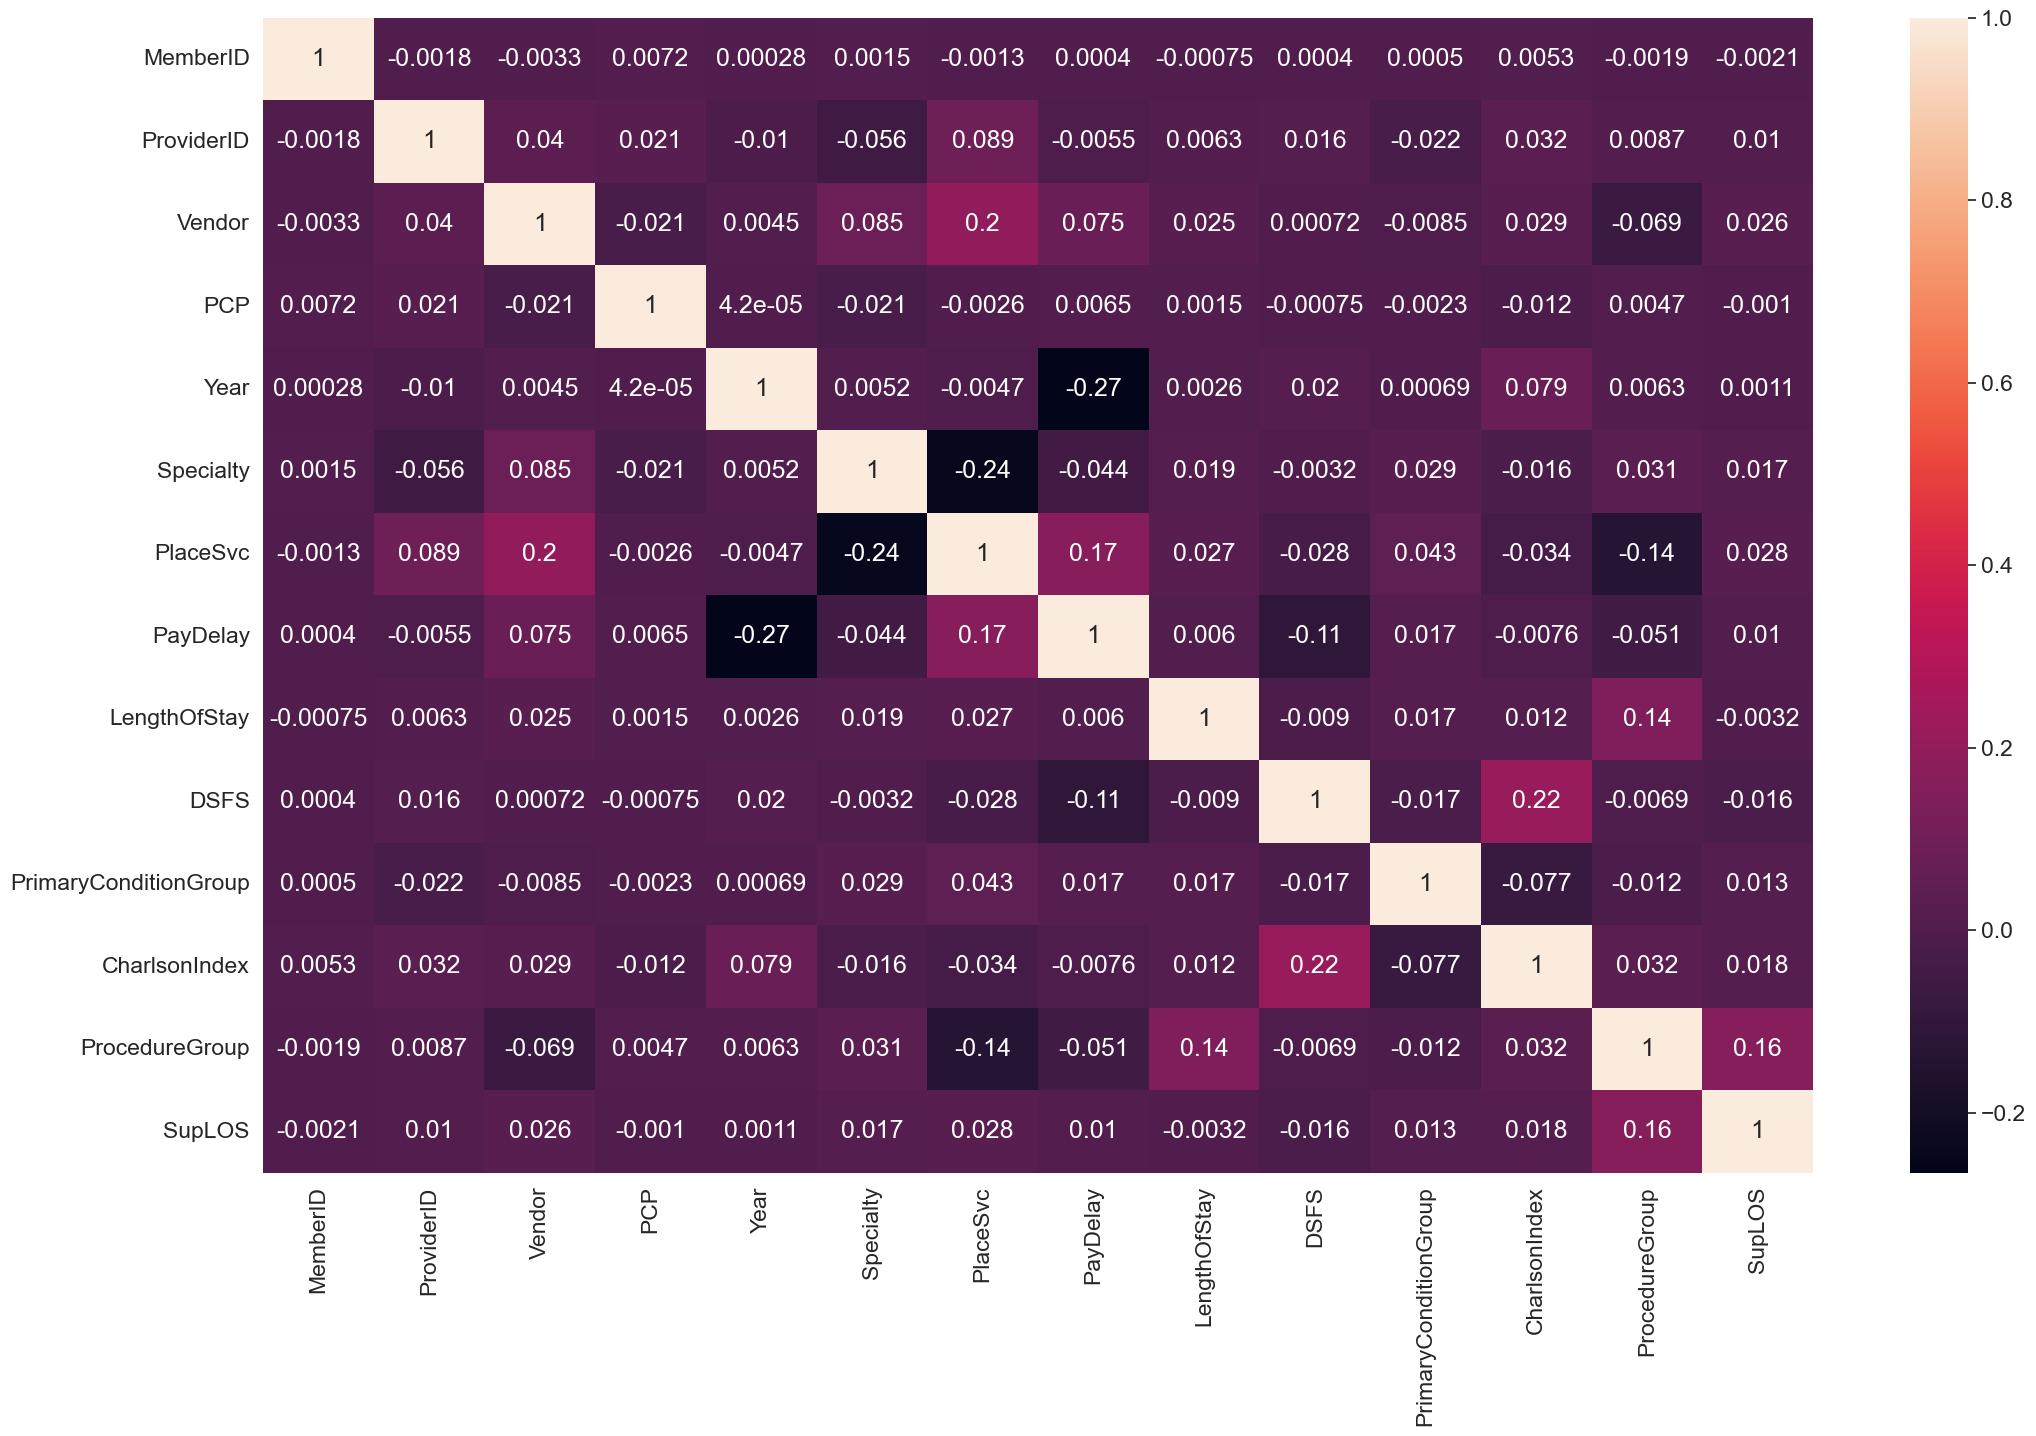

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
sns.set(font_scale=1.5)
sns.heatmap(claims.corr(), annot=True)

Next we are loading in the days in hospital data

In [214]:
days_y2 = pd.read_csv("HeritageHealth/HHP_release3/DaysInHospital_Y2.csv")
#days_y2["Year"] = 2
days_y2 = days_y2.rename({"DaysInHospital": "DaysInHospitalY2"}, axis=1)
days_y2

,MemberID,ClaimsTruncated,DaysInHospitalY2
0,24027423,0,0
1,98324177,0,0
2,33899367,1,1
3,5481382,0,1
4,69908334,0,0
...,...,...,...
76033,1702326,0,0
76034,31530440,0,0
76035,87102780,0,0
76036,74032946,0,0


In [215]:
days_y3 = pd.read_csv("HeritageHealth/HHP_release3/DaysInHospital_Y3.csv")
#days_y3["Year"] = 3
days_y3 = days_y3.rename({"DaysInHospital": "DaysInHospitalY3"}, axis=1)
days_y3

,MemberID,ClaimsTruncated,DaysInHospitalY3
0,90963501,0,0
1,85160905,0,0
2,45496648,0,0
3,45162557,0,0
4,68793937,0,0
...,...,...,...
71430,206785,0,0
71431,93465383,0,0
71432,57466586,0,0
71433,57283229,0,0


In [216]:
days_y2["DaysInHospitalY2"].value_counts()

0     64269
1      4835
2      2366
3      1453
4       977
5       565
6       373
15      261
7       256
8       173
9       148
10      106
11       80
12       73
13       61
14       42
Name: DaysInHospitalY2, dtype: int64

In [217]:
days = pd.concat([days_y2, days_y3])
days.loc[days["MemberID"]==210]

,MemberID,ClaimsTruncated,DaysInHospitalY2,DaysInHospitalY3
63884,210,0,0.0,NaN
57333,210,0,NaN,0.0


We are also looking at the members data. This table consists of three feautres: MemberID, AgeAtFirstClaim and Sex.

In [218]:
members = pd.read_csv("HeritageHealth/HHP_release3/Members.csv")
members.isna().sum()

MemberID               0
AgeAtFirstClaim     5753
Sex                17552
dtype: int64

What we can see it that we have many missing values for both AgeAtFirstClaim and Sex. 

In [219]:
ageGroups = {"0-9": 0, "10-19": 10, "20-29": 20, "30-39": 30, "40-49": 40, "50-59": 50, 
        "60-69": 60, "70-79": 70, "80+": 80}
sex = {"M": 2, "F": 1, "N": 0}

members["AgeAtFirstClaim"] = members["AgeAtFirstClaim"].replace(to_replace=ageGroups)
members["AgeAtFirstClaim"] = members["AgeAtFirstClaim"] .fillna(-1)

members["Sex"] = members["Sex"].fillna("N")
members["Sex"] = members["Sex"].replace(to_replace=sex)

members

,MemberID,AgeAtFirstClaim,Sex
0,14723353,70.0,2
1,75706636,70.0,2
2,17320609,70.0,2
3,69690888,40.0,2
4,33004608,0.0,2
...,...,...,...
112995,99711514,40.0,1
112996,31690877,50.0,1
112997,9519985,30.0,1
112998,92806272,50.0,1


Processing the labcount data

In [220]:
labs = pd.read_csv("HeritageHealth/HHP_release3/LabCount.csv")
labs["DSFS"] = labs["DSFS"].replace(to_replace=dfds)
labs["DSFS"] = labs["DSFS"].fillna(0)
labs["LabCount"] = labs["LabCount"].replace(to_replace={"10+": "10"})
labs = labs.groupby(['Year', 'MemberID']).agg({'LabCount': ['count']}).reset_index()
labs.columns = ["Year", "MemberID", "LabCount"]
labs["Year"] = labs["Year"].replace(to_replace=year)

labs

,Year,MemberID,LabCount
0,1,210,1
1,1,3889,1
2,1,11951,1
3,1,14661,1
4,1,14778,1
...,...,...,...
154929,3,99982956,1
154930,3,99987030,1
154931,3,99992565,1
154932,3,99993334,1


Processing the drugcount data

In [221]:
drugs = pd.read_csv("HeritageHealth/HHP_release3/DrugCount.csv")
drugs["DSFS"] = drugs["DSFS"].replace(to_replace=dfds)
drugs["DSFS"] = drugs["DSFS"].fillna(0)
drugs["Year"] = drugs["Year"].replace(to_replace=year)
drugs["DrugCount"] = drugs["DrugCount"].replace(to_replace={"7+": "7"})
drugs = drugs.groupby(['Year', 'MemberID']).agg({'DrugCount': ['count']}).reset_index()
drugs.columns = ["Year", "MemberID", "DrugCount"]

drugs

,Year,MemberID,DrugCount
0,1,210,3
1,1,3197,4
2,1,3889,10
3,1,4187,10
4,1,9063,2
...,...,...,...
141566,3,99985795,10
141567,3,99985996,12
141568,3,99993334,4
141569,3,99995391,12


## Merging relevant data

Creating a simple linear model

In [222]:
df = claims_agg.merge(members, on="MemberID")
#df = df.merge(days, how='left', on=['MemberID', 'Year'])

df = df.merge(days_y2, how='inner', on=['MemberID'])
df = df.merge(days_y3, how='inner', on=['MemberID'])
df = df.drop(columns=['ClaimsTruncated_x', 'ClaimsTruncated_y'])
df

,Year,MemberID,ClaimsCount,ProviderCount,PrimaryConditionGroupCount,MinPayDelay,MaxPayDelay,TotalPayDelay,MaxCharlsonIndex,UniqueProcedureGroup,AgeAtFirstClaim,Sex,DaysInHospitalY2,DaysInHospitalY3
0,1,210,4,3,4,22,162,327,0,3,30.0,0,0,0
1,2,210,2,2,2,31,38,69,0,2,30.0,0,0,0
2,3,210,2,2,2,23,41,64,0,2,30.0,0,0,0
3,1,3197,2,2,2,42,162,204,0,1,0.0,1,0,0
4,2,3197,2,2,2,26,27,53,0,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143397,1,99977491,4,3,4,41,162,308,0,2,60.0,1,0,3
143398,2,99977491,3,2,3,35,41,113,2,2,60.0,1,0,3
143399,3,99977491,5,5,5,21,30,124,2,3,60.0,1,0,3
143400,1,99995554,3,2,3,23,122,172,0,2,40.0,2,0,0


In [224]:
df_drugs_labs = df.merge(drugs[["MemberID", "DrugCount"]], how='left', on=['MemberID'])
df_drugs_labs = df_drugs_labs.merge(labs[["MemberID", "LabCount"]], how='left', on=['MemberID'])

# HER KAN DE BLI FUCKED, SÅ GJERNE KOMMENTER UT
#df_drugs_labs = df_drugs_labs.rename({'DrugCount_x': 'DrugCount', 'LabCount_x': 'LabCount'})
#df_drugs_labs = df.drop(columns=['DrugCount_y', 'LabCount_y'], axis=1)

df_drugs_labs = df_drugs_labs.fillna(0)
df_drugs_labs.isna().sum()

Year                          0
MemberID                      0
ClaimsCount                   0
ProviderCount                 0
PrimaryConditionGroupCount    0
MinPayDelay                   0
MaxPayDelay                   0
TotalPayDelay                 0
MaxCharlsonIndex              0
UniqueProcedureGroup          0
AgeAtFirstClaim               0
Sex                           0
DaysInHospitalY2              0
DaysInHospitalY3              0
DrugCount                     0
LabCount                      0
dtype: int64

<AxesSubplot: >

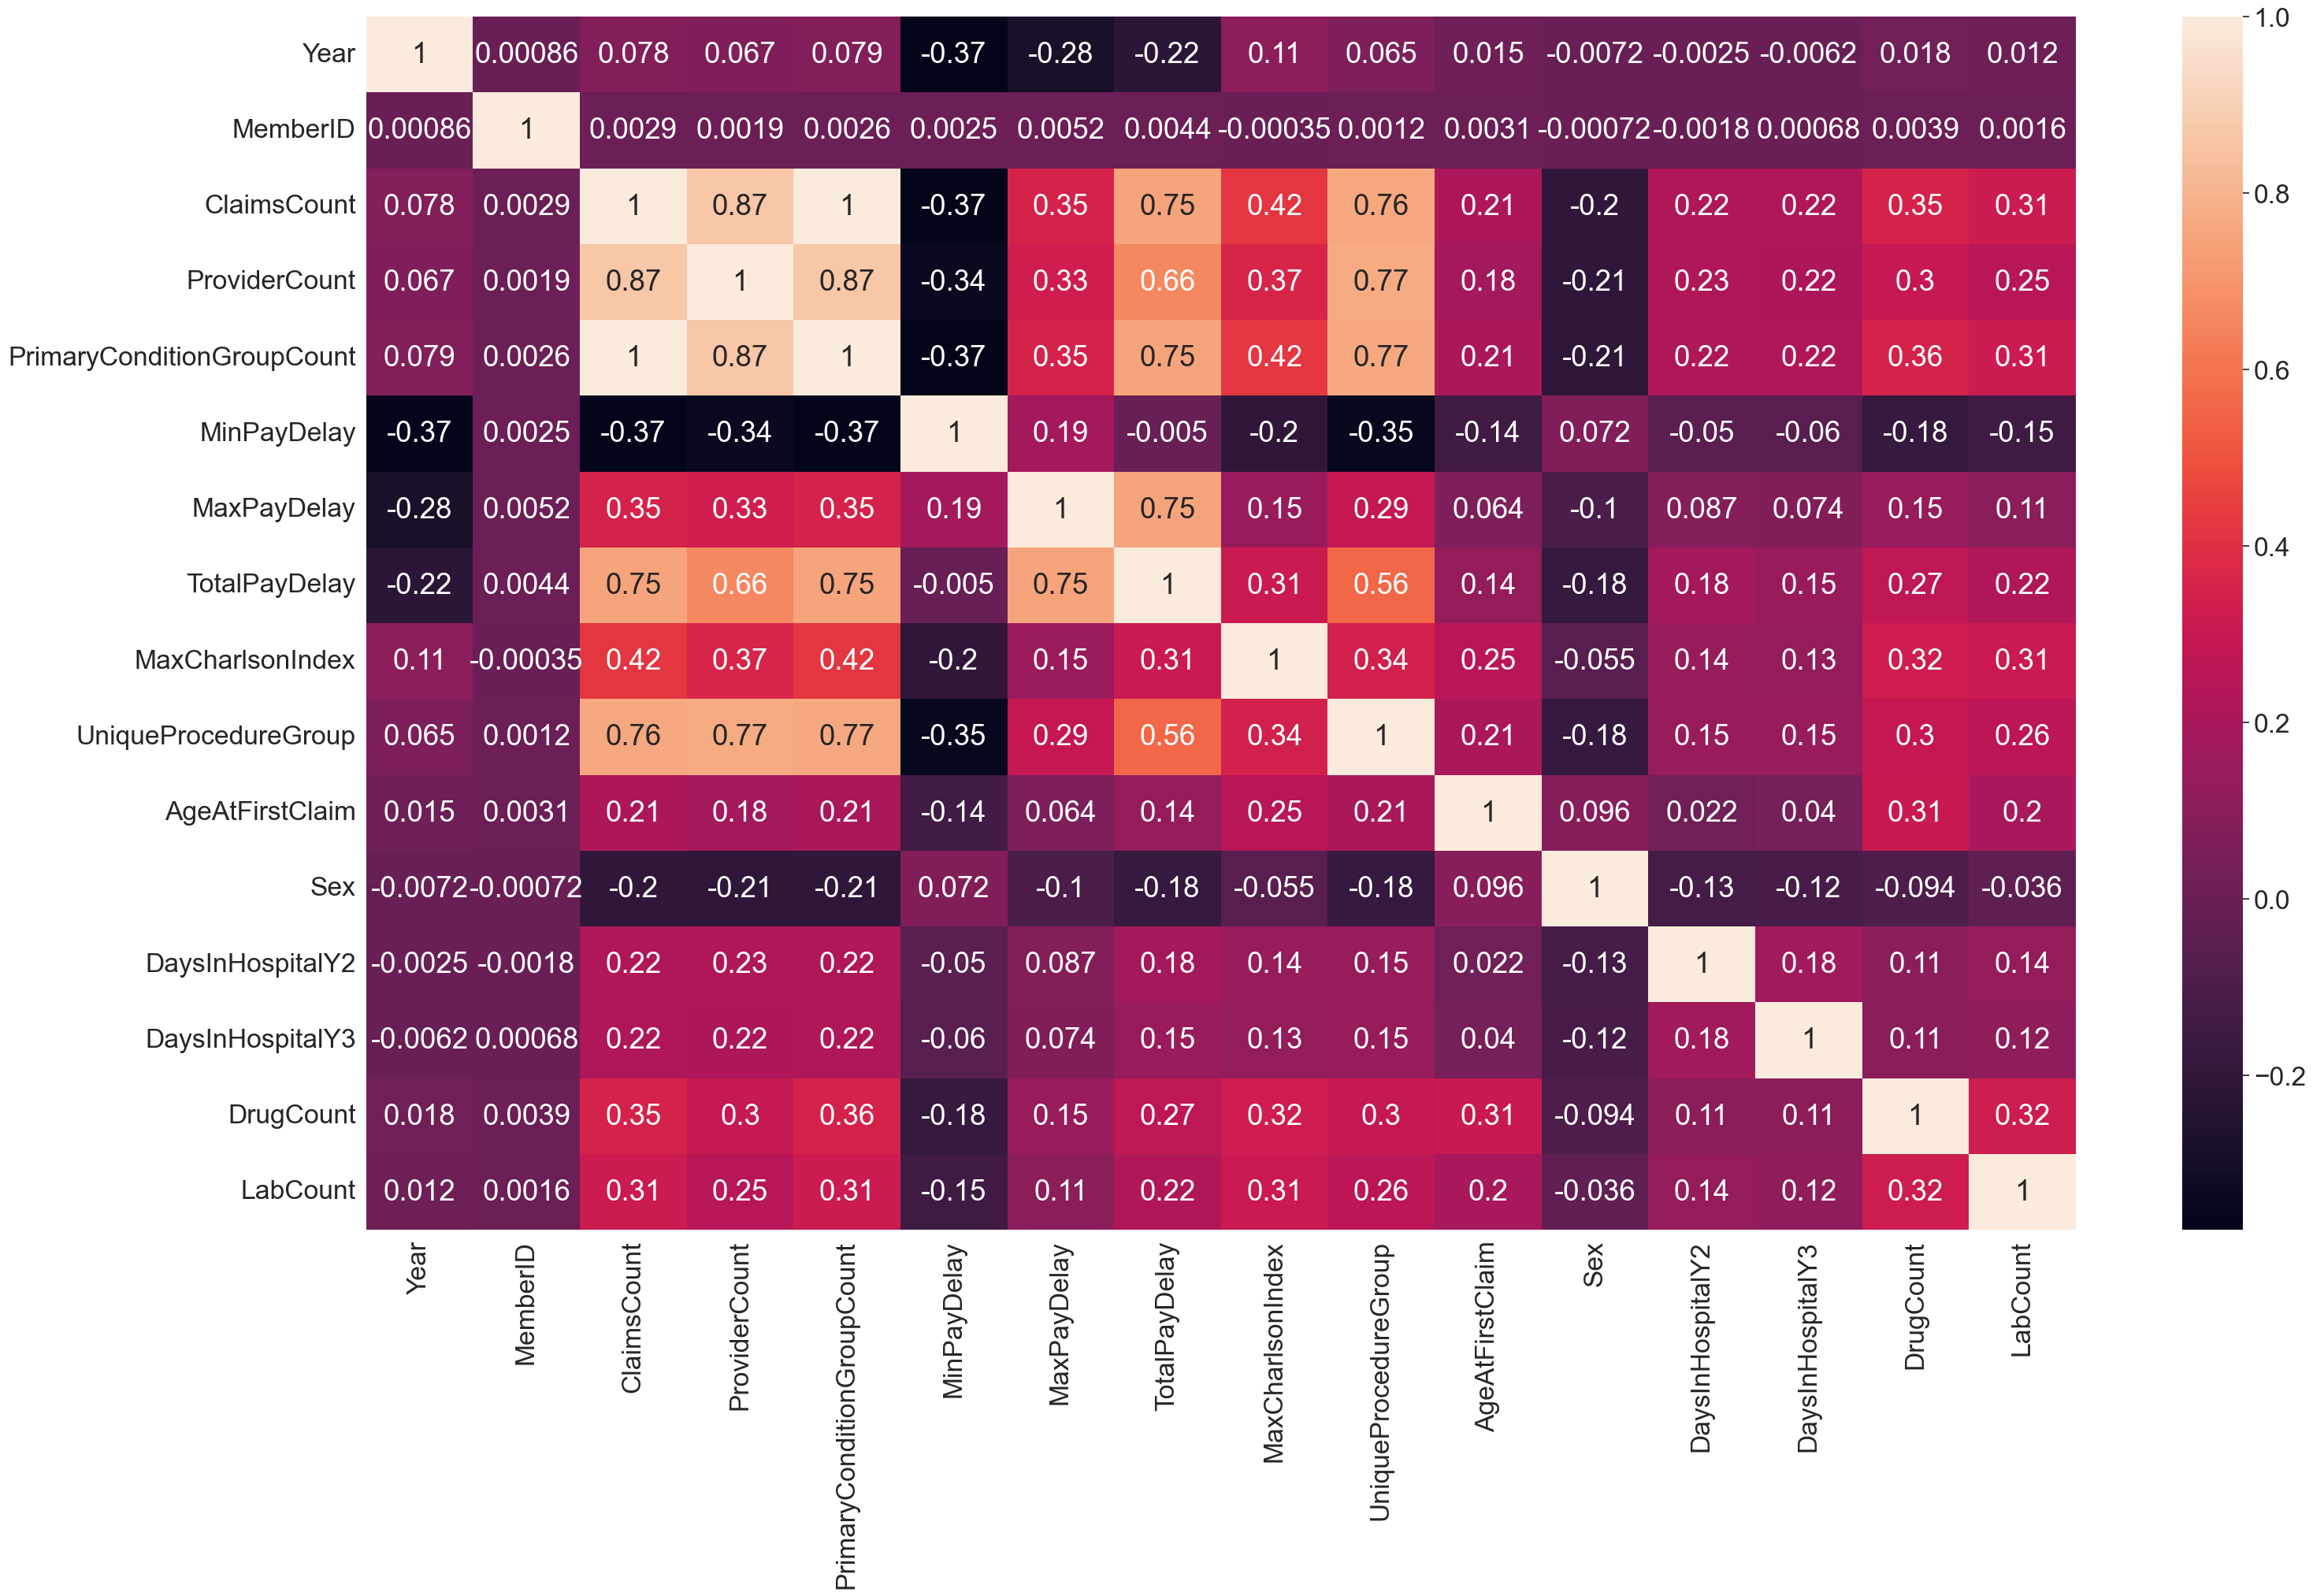

In [225]:
df = df_drugs_labs
#df = df.rename({'Year_x': 'Year'}, axis=1)
#df = df.drop('Year_y', axis=1)

plt.figure(figsize=(35, 20))
sns.set(font_scale=2.2)
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: xlabel='DaysInHospitalY2', ylabel='count'>

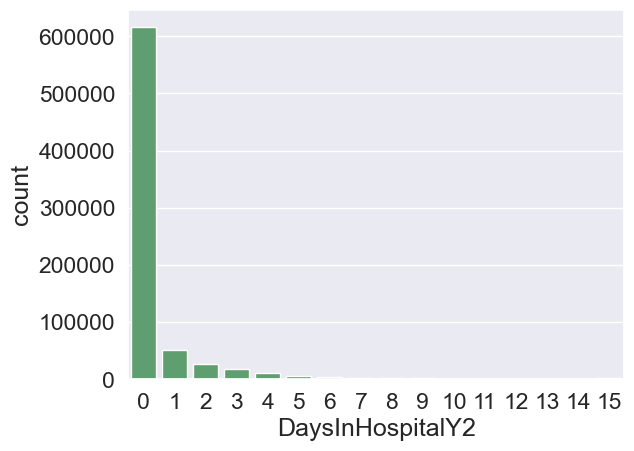

In [226]:
sns.set(font_scale=1.5)
sns.countplot(data=df, x="DaysInHospitalY2", color='g')

<AxesSubplot: xlabel='DaysInHospitalY3', ylabel='count'>

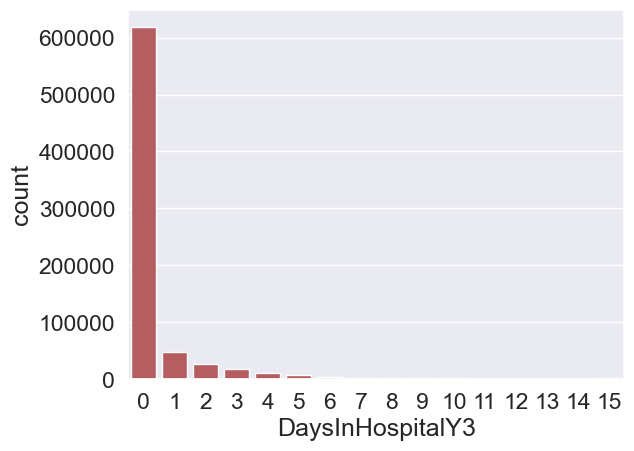

In [227]:
sns.countplot(data=df, x="DaysInHospitalY3", color='r')

In [161]:
df["DaysInHospital"].value_counts()

0     1310462
1      104034
2       56958
3       37591
4       23689
5       13888
6        8552
7        5936
15       4465
8        3978
9        3239
10       2615
11       1667
12       1664
13       1433
14        787
Name: DaysInHospital, dtype: int64

## Analysis

We are now gonna explore our own questions about the electronic health records data. One interesting thing to look at would be how many primary conditions people have on average in relation with their age. 

In [228]:
# Import seaborn
import seaborn as sns

In [229]:
counts = df["AgeAtFirstClaim"].value_counts()
counts

 70.0    199625
 60.0    119573
 80.0     87008
 50.0     81319
 40.0     79537
-1.0      61246
 30.0     45322
 0.0      27061
 10.0     24160
 20.0     21098
Name: AgeAtFirstClaim, dtype: int64

In [232]:
avg = df.groupby(['AgeAtFirstClaim']).mean().reset_index()

# After looking through the df above, we selected the most interesting features in the df below. 
avg = avg[["AgeAtFirstClaim", "PrimaryConditionGroupCount", "MaxCharlsonIndex", "DaysInHospitalY2"]]
df_avg = avg.loc[avg['AgeAtFirstClaim'] != -1]
df_avg

,AgeAtFirstClaim,PrimaryConditionGroupCount,MaxCharlsonIndex,DaysInHospitalY2
1,0.0,2.823066,0.317505,0.184731
2,10.0,2.792136,0.304429,0.185017
3,20.0,3.318324,0.240212,0.608920
4,30.0,3.584727,0.423547,0.366268
5,40.0,3.924224,0.650879,0.218879
6,50.0,4.340191,0.910316,0.304923
7,60.0,5.061845,1.311793,0.438602
8,70.0,5.648796,1.495860,0.624481
9,80.0,6.170938,1.647803,0.797099


<AxesSubplot: xlabel='AgeAtFirstClaim', ylabel='PrimaryConditionGroupCount'>

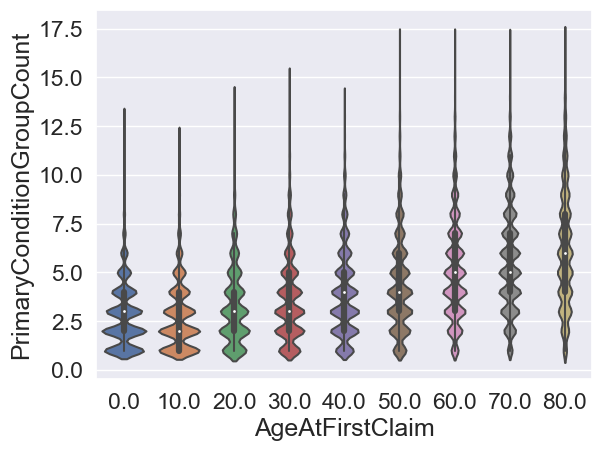

In [233]:
avg =  df[["AgeAtFirstClaim", "PrimaryConditionGroupCount", "MaxCharlsonIndex", "DaysInHospitalY2"]]
avg = avg.loc[avg['AgeAtFirstClaim'] != -1]

sns.set(font_scale=1.5)
sns.violinplot(data=avg, x="AgeAtFirstClaim", y="PrimaryConditionGroupCount")

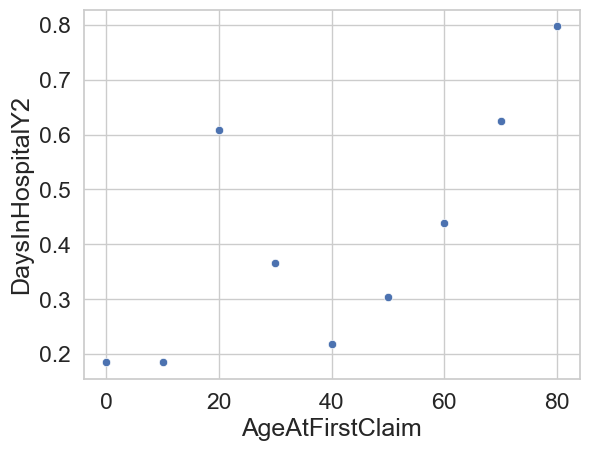

In [234]:
sns.set_style("whitegrid")
ax = sns.scatterplot(data=df_avg, x="AgeAtFirstClaim", y="DaysInHospitalY2")

## Model Training

Splitting the data into training and test data

In [239]:
# Preparing for randomize split of data

df_y1 = df.loc[df["Year"] == 1]
df_y2 = df.loc[df["Year"] == 2]
df_y3 = df.loc[df["Year"] == 3]

#plt.figure(figsize=(35, 20))
#sns.set(font_scale=2.2)
#sns.heatmap(df.corr(), annot=True)

features = df_y1.drop(["DaysInHospitalY2", "DaysInHospitalY3", "MemberID", "Year"], axis=1)
target = df_y1["DaysInHospitalY2"]

In [240]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# split into train test sets
#X_train, X_test, y_train, y_test = df_train.drop(columns=['DaysInHospital', 'MemberID']), df_test.drop(columns=['DaysInHospital', 'MemberID']), df_train['DaysInHospital'], df_test['DaysInHospital']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(173228, 12) (85322, 12) (173228,) (85322,)


In [241]:
features

,ClaimsCount,ProviderCount,PrimaryConditionGroupCount,MinPayDelay,MaxPayDelay,TotalPayDelay,MaxCharlsonIndex,UniqueProcedureGroup,AgeAtFirstClaim,Sex,DrugCount,LabCount
0,4,3,4,22,162,327,0,3,30.0,0,3.0,1.0
1,4,3,4,22,162,327,0,3,30.0,0,3.0,1.0
2,4,3,4,22,162,327,0,3,30.0,0,3.0,1.0
3,4,3,4,22,162,327,0,3,30.0,0,4.0,1.0
4,4,3,4,22,162,327,0,3,30.0,0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
745934,4,3,4,41,162,308,0,2,60.0,1,7.0,1.0
745941,3,2,3,23,122,172,0,2,40.0,2,4.0,3.0
745942,3,2,3,23,122,172,0,2,40.0,2,4.0,1.0
745943,3,2,3,23,122,172,0,2,40.0,2,1.0,3.0


Implementing official evaluation metric:

In [242]:
def rmse(true, pred):
    return np.sqrt(np.mean(np.power(np.log(pred + 1) - np.log(true + 1), 2)))

<h3>Random Forest Classifier</h3>
Starting by testing a RFC-model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_features': ['log2', 'sqrt'], 'ccp_alpha': [0, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1]}

# Finding best parameters with cross-validation
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5).fit(X_train, y_train)

bp = clf.best_params_
bp

In [243]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(ccp_alpha=2*10**-5, max_features='log2') # ccp_alpha=bp['ccp_alpha'], max_features=bp['max_features']
rfc.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=2e-05, max_features='log2')

In [244]:
train_preds_rfc = rfc.predict(X_train)
test_preds_rfc = rfc.predict(X_test)

print(f'Accuracy score on training-samples: {accuracy_score(y_train, train_preds_rfc)}')
print(f'Accuracy score on testing-samples: {accuracy_score(y_test, test_preds_rfc)}')
print()
print(f'Official RMSE score on training-samples: {rmse(y_train, train_preds_rfc)}')
print(f'Official RMSE score on testing-samples: {rmse(y_test, test_preds_rfc)}')
print()
np.unique(train_preds_rfc, return_counts=True)

Accuracy score on training-samples: 0.9000565728404184
Accuracy score on testing-samples: 0.8733972480720096

Official RMSE score on training-samples: 0.42032833724960694
Official RMSE score on testing-samples: 0.47147521680990795



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([160267,   4910,   2881,   1622,   1184,    745,    443,    295,
           207,    141,    101,     72,     89,     48,     51,    172],
       dtype=int64))

<h3>Gradient Boosting Classifier</h3>
Now testing a boosting classifier

In [245]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
params = {'max_depth': [5, 6, 7, 8, 15], 
          'ccp_alpha': [0, 10**-6, 10**-5, 10**-4, 10**-3],
          'max_features': ['sqrt', 'log2']
         }

# Finding best parameters with cross-validation
clf = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, cv=5).fit(X_train, y_train)

bp = clf.best_params_
bp

After training for 5 hours:

* best params: {'ccp_alpha': 0.0001, 'max_depth': 5, 'max_features': 'sqrt'}

In [247]:
gb = GradientBoostingClassifier(max_depth=5,
                                ccp_alpha=10**-4,
                                max_features='sqrt'
                               )

gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0001, max_depth=5, max_features='sqrt')

In [248]:
train_preds_gb = gb.predict(X_train)
test_preds_gb = gb.predict(X_test)

print(f'Accuracy score on training-samples: {accuracy_score(y_train, train_preds_gb)}')
print(f'Accuracy score on testing-samples: {accuracy_score(y_test, test_preds_gb)}')
print()
print(f'Official RMSE score on training-samples: {rmse(y_train, train_preds_gb)}')
print(f'Official RMSE score on testing-samples: {rmse(y_test, test_preds_gb)}')
print()
np.unique(train_preds_gb, return_counts=True)

Accuracy score on training-samples: 0.8253861962269379
Accuracy score on testing-samples: 0.8243946461639436

Official RMSE score on training-samples: 0.5549739879729658
Official RMSE score on testing-samples: 0.5559317327901852



(array([0], dtype=int64), array([173228], dtype=int64))